In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('../Datasets/medical-charges.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
''' EDA:

df.describe()
df.info()
df.isnull().sum() '''

' EDA:\n\ndf.describe()\ndf.info()\ndf.isnull().sum() '

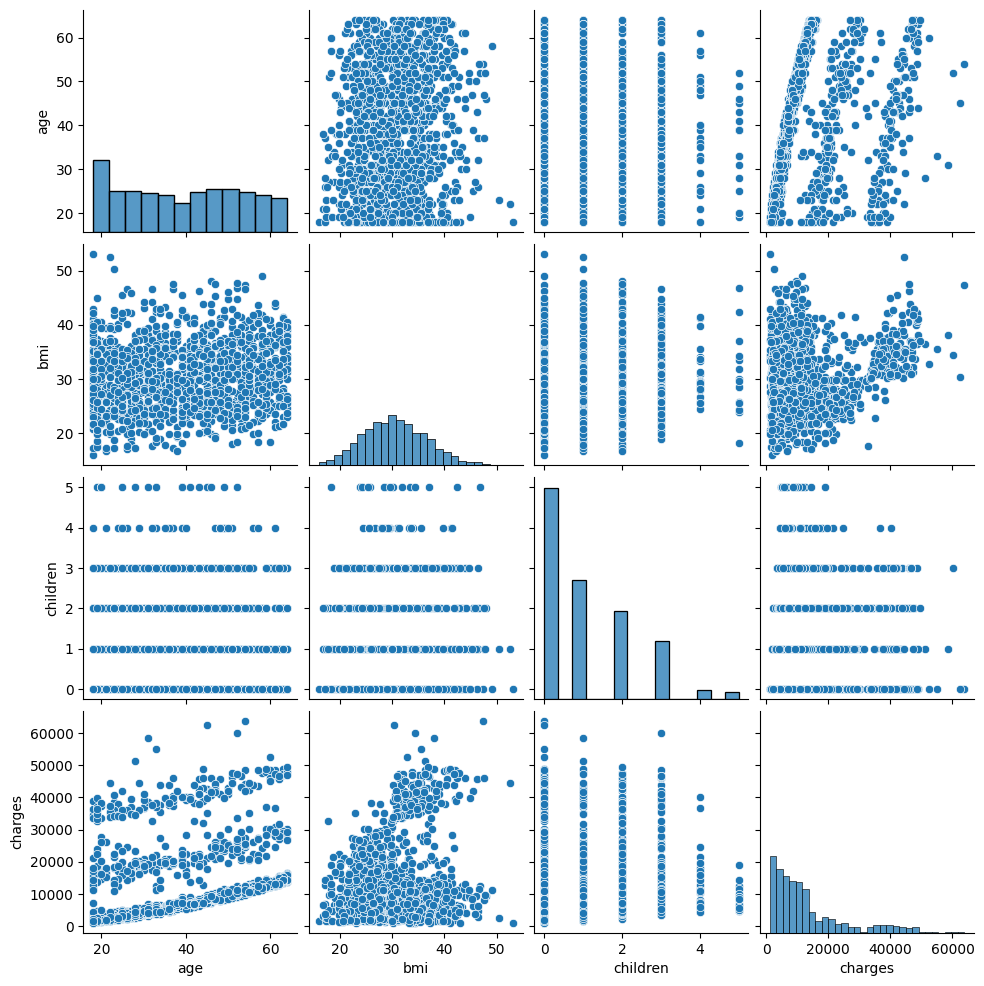

In [15]:
sns.pairplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.show()

In [16]:
X = df[['age','bmi']]

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

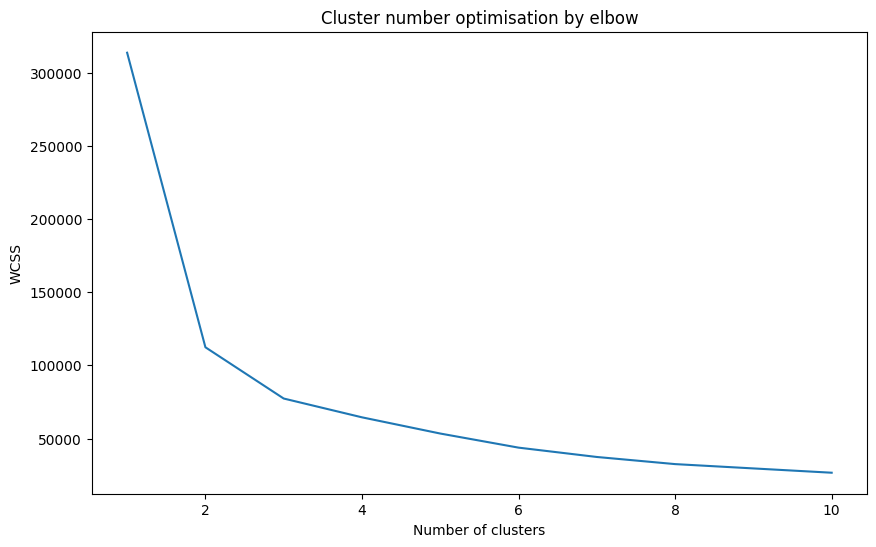

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [24]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [25]:
y_kmeans = kmeans.fit_predict(X)

In [26]:
type(y_kmeans)

numpy.ndarray

In [27]:
df['Cluster'] = y_kmeans

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Cluster
0,19,female,27.900,0,yes,southwest,16884.92400,2
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,4


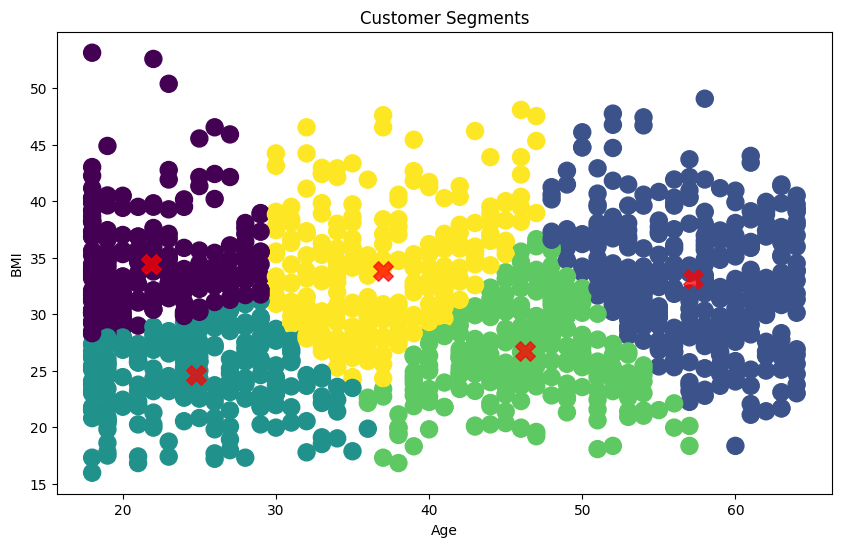

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=150, cmap='viridis')  # review slicing through iterables; 0, 1 stands for columns
centers = kmeans.cluster_centers_  # Retrieves coordinates of cluster centers
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=.75, marker='X')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Customer Segments")
plt.show()

In [34]:
avg_spending_income_in_cluster = df.groupby("Cluster")[["age", "bmi"]].mean().sort_index()

avg_spending_income_in_cluster

,age,bmi
Cluster,,
0,21.831818,34.400727
1,57.185075,33.123522
2,24.792531,24.606017
3,46.247191,26.699082
4,37.003636,33.834109
